## **Smart Agricultural Production Optimizing Engine**



In [ ]:
#import important Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact

## 1.Pre processing

In [ ]:
#load the data
df = pd.read_csv('Crop_recommendation.csv')

In [ ]:
#first 5 rows of dataset
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [ ]:
#num of rows and columns
df.shape

(2200, 8)

In [ ]:
#last 5 rows of dataset
df.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [ ]:
#checking data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [ ]:
##Check datatype for each column
df.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

In [ ]:
#Renaiming Columns
df.columns = ['Nitrogen','Phosphorus','Potassium','Temperature','Humidity','pH_Level','Rainfall','Crop_Type',]
df.head()

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Level,Rainfall,Crop_Type
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


### 1.1 Data Visualization

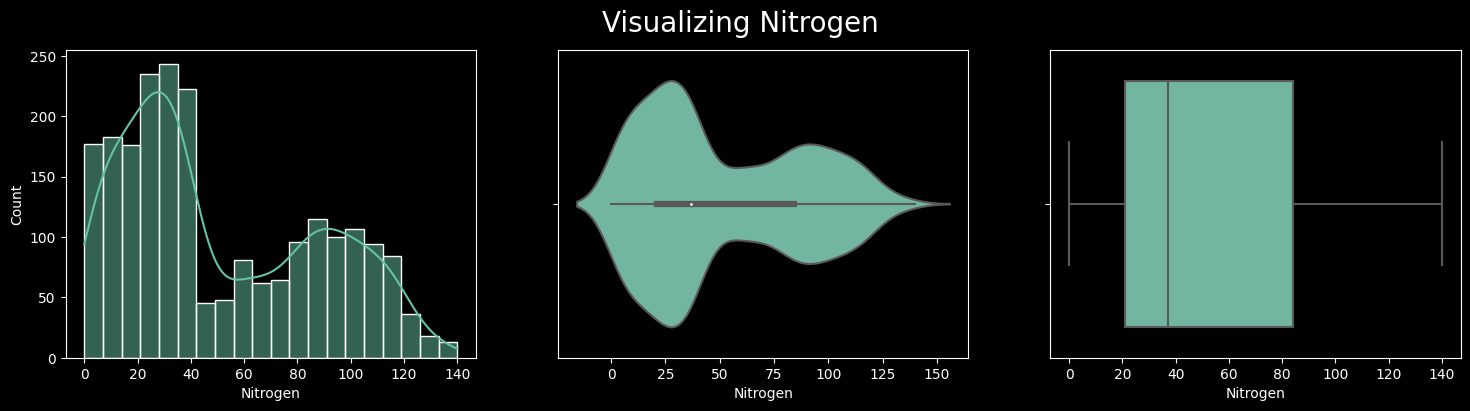

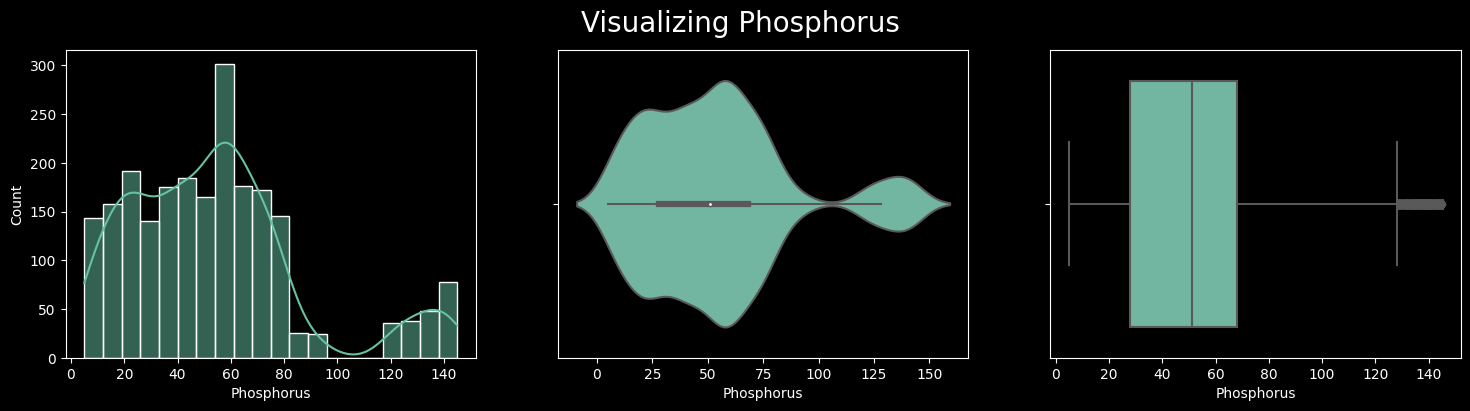

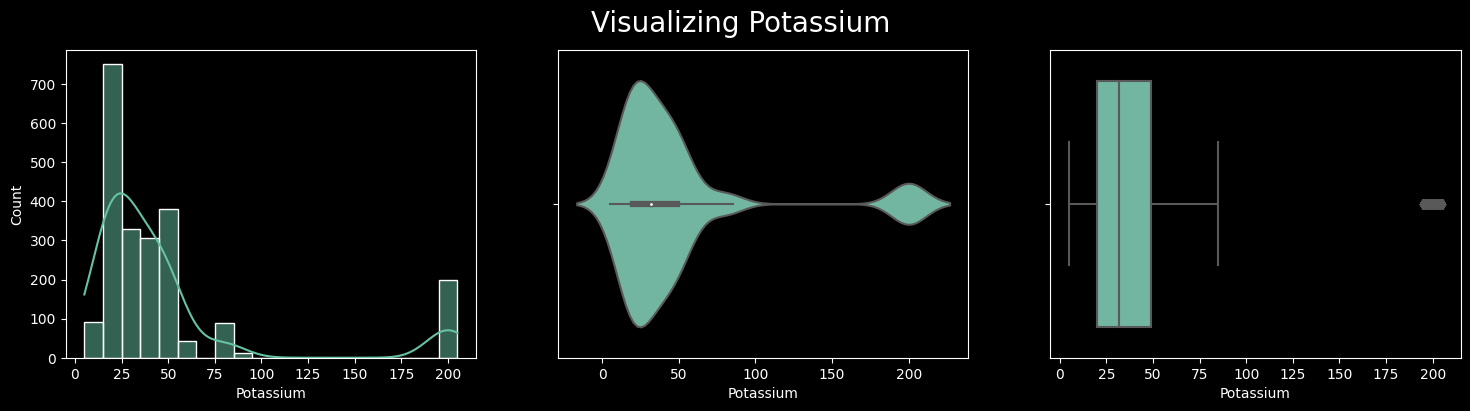

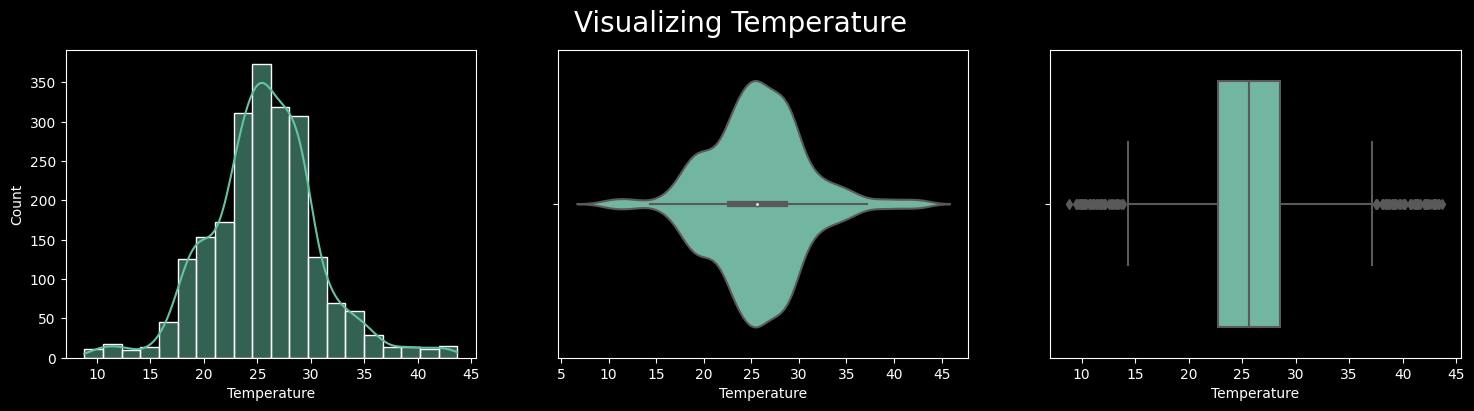

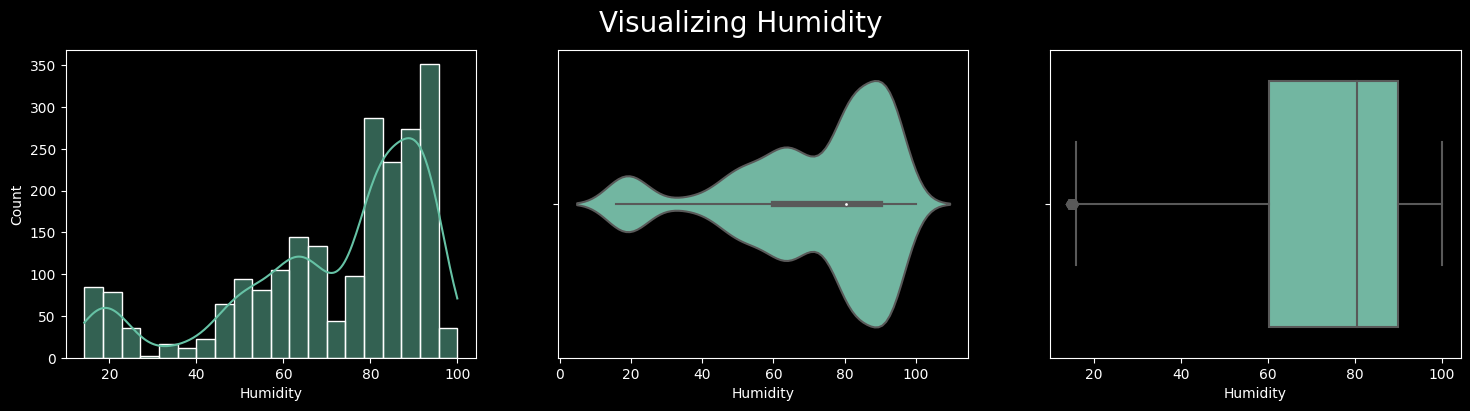

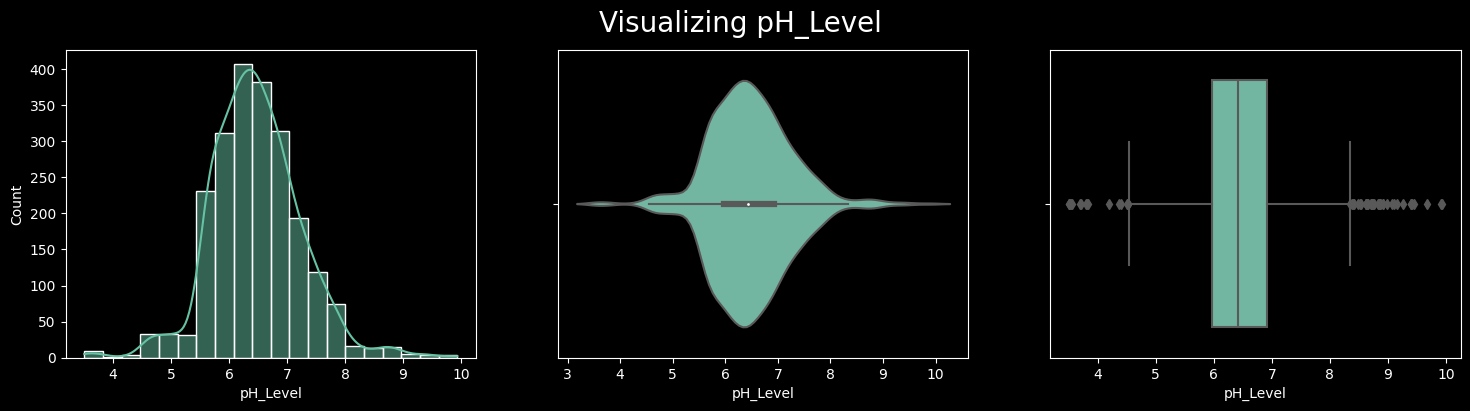

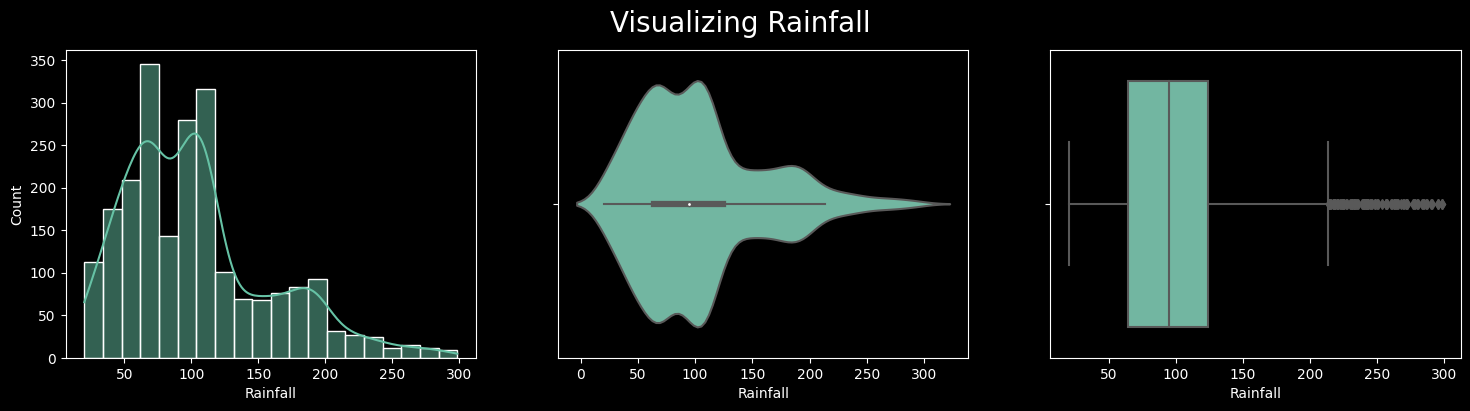

In [ ]:
#Exploratory Data Analysis(EDA) to display the distributions of numerical variables
plt.style.use('dark_background')
sns.set_palette("Set2")
for i in df.columns[:-1]:
    fig,ax=plt.subplots(1,3,figsize=(18,4))
    sns.histplot(data=df,x=i,kde=True,bins=20,ax=ax[0])
    sns.violinplot(data=df,x=i,ax=ax[1])
    sns.boxplot(data=df,x=i,ax=ax[2])
    plt.suptitle(f'Visualizing {i}',size=20)

In [ ]:
grouped = df.groupby(by='Crop_Type').mean().reset_index()
grouped

,Crop_Type,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Level,Rainfall
0,apple,20.80,134.22,199.89,22.630942,92.333383,5.929663,112.654779
1,banana,100.23,82.01,50.05,27.376798,80.358123,5.983893,104.626980
2,blackgram,40.02,67.47,19.24,29.973340,65.118426,7.133952,67.884151
3,chickpea,40.09,67.79,79.92,18.872847,16.860439,7.336957,80.058977
4,coconut,21.98,16.93,30.59,27.409892,94.844272,5.976562,175.686646
5,coffee,101.20,28.74,29.94,25.540477,58.869846,6.790308,158.066295
6,cotton,117.77,46.24,19.56,23.988958,79.843474,6.912675,80.398043
7,grapes,23.18,132.53,200.11,23.849575,81.875228,6.025937,69.611829
8,jute,78.40,46.86,39.99,24.958376,79.639864,6.732778,174.792798
9,kidneybeans,20.75,67.54,20.05,20.115085,21.605357,5.749411,105.919778


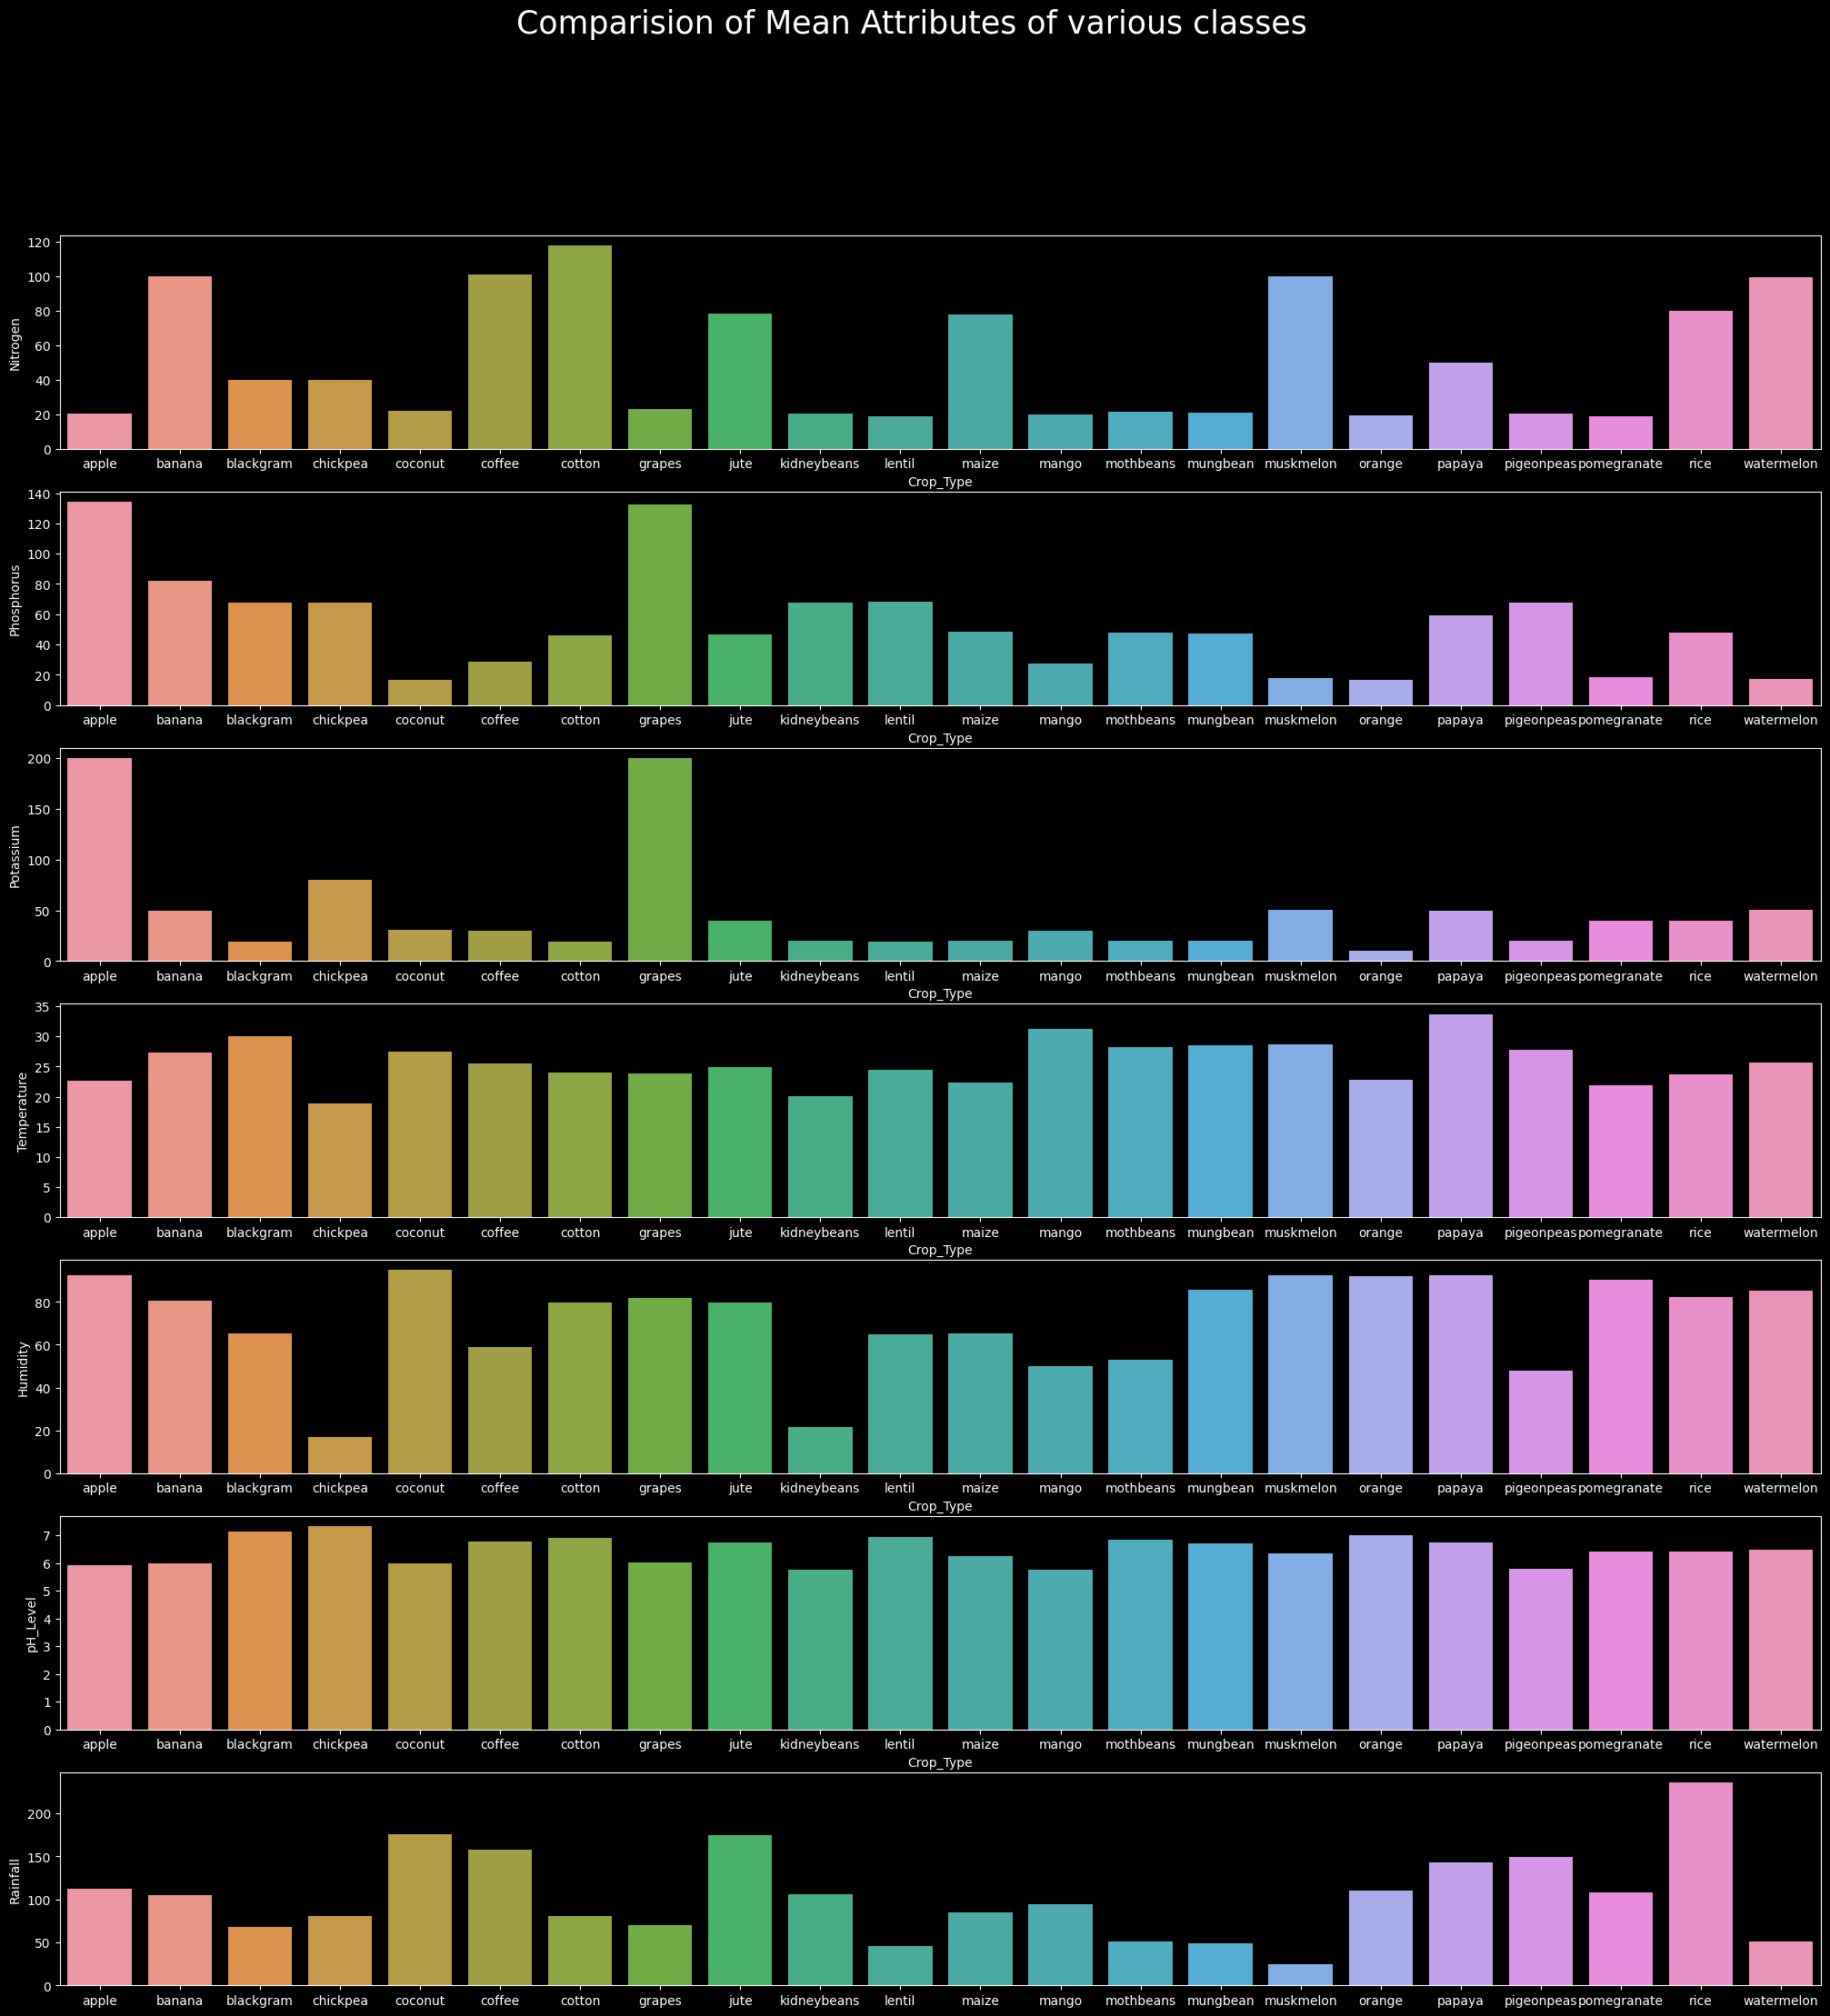

In [ ]:
# comparing mean values for different attributes
fig,ax=plt.subplots(7,1,figsize=(25,25))
for index,i in enumerate(grouped.columns[1:]):
    sns.barplot(data=grouped,x='Crop_Type',y=i,ax=ax[index])
    plt.suptitle("Comparision of Mean Attributes of various classes",size=25)
    plt.xlabel("")

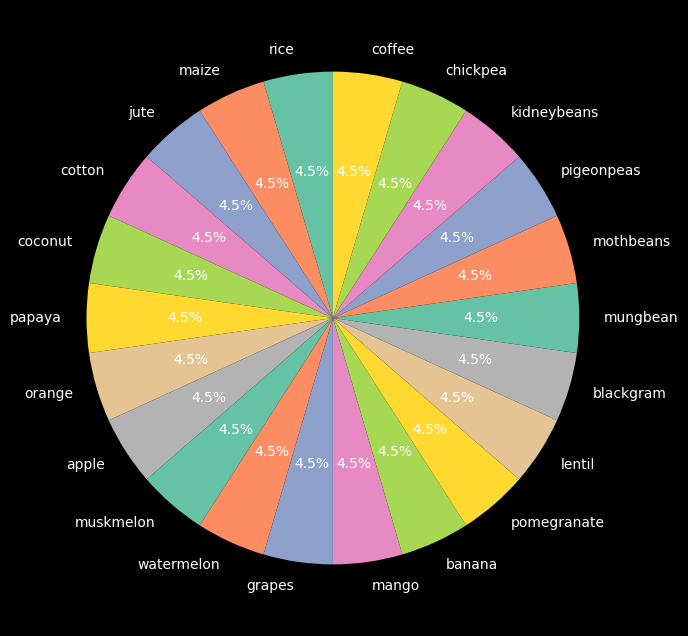

In [ ]:
#piechart that shows the distribution of crops over the dataset
plt.figure(figsize=(8, 8))
target_counts = df['Crop_Type'].value_counts()
plt.pie(target_counts, labels=target_counts.index, autopct='%1.1f%%', startangle=90)
plt.show()

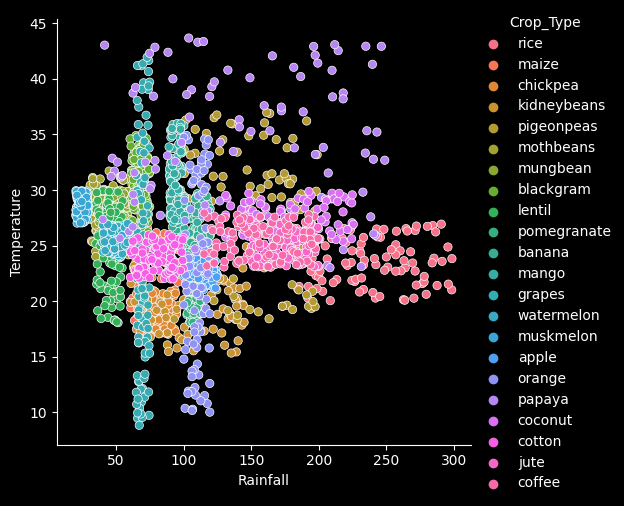

In [ ]:
#visualizing the relationship between weather conditions like rainfall and humidity with each crop type
sns.relplot(x='Rainfall',y='Temperature',data=df,kind='scatter',hue='Crop_Type',height=5)
plt.show()

### 1.2 Missing Values Treatment

In [ ]:
#Checking for null values
df.isnull().sum()

Nitrogen       0
Phosphorus     0
Potassium      0
Temperature    0
Humidity       0
pH_Level       0
Rainfall       0
Crop_Type      0
dtype: int64

In [ ]:
#find duplicate rows across all columns
df.duplicated().sum()

0

In [ ]:
df[pd.isnull(df).any(axis=1)]

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Level,Rainfall,Crop_Type


As shown here that there is no null values in the data set or in any row

### 1.3 Data Analysis

In [ ]:
#Calculaiting the (Min, Max, Mean, Variance, Standard Deviation) using the describe property

df.describe()

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Level,Rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [ ]:
#Calculaiting the (Skewness, Kurtosis) using their built in functions
df.kurt()

<ipython-input-31-d14f6da3704d>:2: FutureWarning: The default value of numeric_only in DataFrame.kurt is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.kurt()


Nitrogen      -1.058240
Phosphorus     0.860279
Potassium      4.449354
Temperature    1.232555
Humidity       0.302134
pH_Level       1.655581
Rainfall       0.607079
dtype: float64

In [ ]:
df.skew()

<ipython-input-32-9e0b1e29546f>:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew()


Nitrogen       0.509721
Phosphorus     1.010773
Potassium      2.375167
Temperature    0.184933
Humidity      -1.091708
pH_Level       0.283929
Rainfall       0.965756
dtype: float64

In [ ]:
#Calculating the Covarience Matrix
cov_matrix = df.cov()
print('Covariance matrix \n%s' %cov_matrix)

Covariance matrix 
                Nitrogen   Phosphorus    Potassium  Temperature    Humidity  \
Nitrogen     1362.889537  -281.860096  -262.727147     4.954622  156.730700   
Phosphorus   -281.860096  1088.068460  1229.998647   -21.303478  -87.197323   
Potassium    -262.727147  1229.998647  2565.212869   -41.134229  215.215502   
Temperature     4.954622   -21.303478   -41.134229    25.641550   23.147400   
Humidity      156.730700   -87.197323   215.215502    23.147400  495.677307   
pH_Level        2.762395    -3.523487    -6.644240    -0.069739   -0.146161   
Rainfall      119.747146  -115.730685  -148.811212    -8.372180  115.534462   

             pH_Level     Rainfall  
Nitrogen     2.762395   119.747146  
Phosphorus  -3.523487  -115.730685  
Potassium   -6.644240  -148.811212  
Temperature -0.069739    -8.372180  
Humidity    -0.146161   115.534462  
pH_Level     0.598980    -4.639202  
Rainfall    -4.639202  3020.424469  


<ipython-input-33-15a8c7657ef5>:2: FutureWarning: The default value of numeric_only in DataFrame.cov is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cov_matrix = df.cov()


Positive correlation


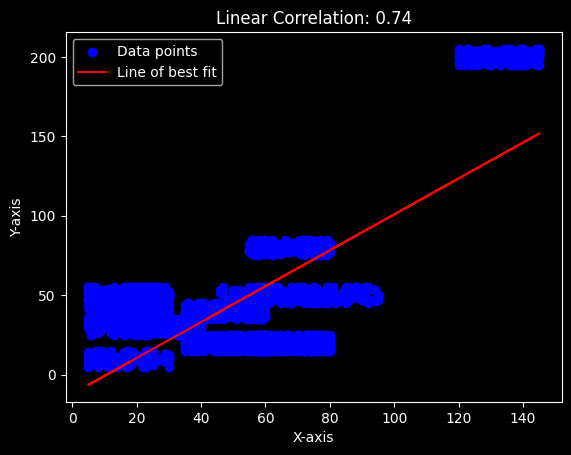

In [ ]:
# Calculating the linear correlation coefficient
correlation_matrix = np.corrcoef(df['Phosphorus'], df['Potassium'])
correlation = correlation_matrix[0, 1]
# Plotting the data
plt.scatter(df['Phosphorus'], df['Potassium'], color='b', label='Data points')
# Calculating the line of best fit
m, b = np.polyfit(df['Phosphorus'], df['Potassium'], 1) # 1 indicates linear fitting
plt.plot(df['Phosphorus'], m*df['Phosphorus'] + b, color='r', label='Line of best fit')
# Adding labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title(f'Linear Correlation: {correlation:.2f}')
# Determining positive or negative correlation
if correlation > 0:
 print("Positive correlation")
elif correlation < 0:
 print("Negative correlation")
else:
 print("No correlation")
# Displaying the plot
plt.legend()
plt.show()

<ipython-input-35-f7305db8b472>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

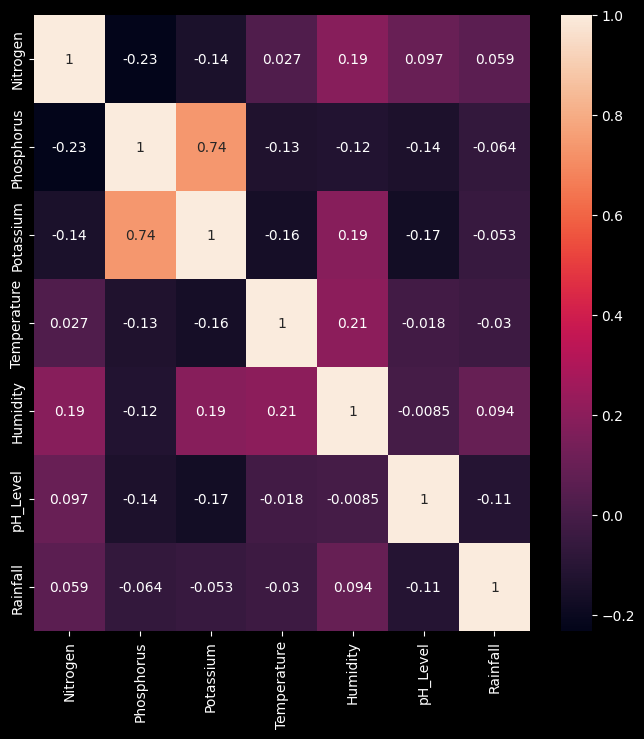

In [ ]:
# Heatmap that shows the relationship between numerical variabales
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(),annot=True)

In [ ]:
#Calculating the Z-test and P value for Temprature and Humidity
import numpy as np
import scipy.stats as stats

# 1st sample
n1 = df['Temperature'].count()
x1 = df['Temperature'].mean()
s1 = df['Temperature'].std()

# 2nd sample
n2 = df['Humidity'].count()
x2 = df['Humidity'].mean()
s2 = df['Humidity'].std()

# Null Hypothesis = mu_1-mu_2 = 0
# Hypothesized difference (under the null hypothesis)
D = 0

# Set the significance level
alpha = 0.05

# Calculate the test statistic (z-score)
z_score = ((x1 - x2) - D) / np.sqrt((s1**2 / n1) + (s2**2 / n2))
print('Z-Score:', np.abs(z_score))

# Calculate the critical value
z_critical = stats.norm.ppf(1 - alpha/2)
print('Critical Z-Score:',z_critical)


# Compare the test statistic with the critical value
if np.abs(z_score) > z_critical:
    print("""Reject the null hypothesis.
There is a significant difference between Temperature and Humidity.""")
else:
    print("""Fail to reject the null hypothesis.
There is not enough evidence to suggest a significant difference between Temperature and Humidity.""")

# Approach 2: Using P-value

# P-Value : Probability of getting less than a Z-score
p_value = 2 * (1 - stats.norm.cdf(np.abs(z_score)))
print('P-Value :',p_value)

# Compare the p-value with the significance level
if p_value < alpha:
    print("""Reject the null hypothesis.
There is a significant difference between the Temperature and Humidity.""")
else:
    print("""Fail to reject the null hypothesis.
There is not enough evidence to suggest significant difference between Temperature and Humidity.""")

Z-Score: 94.22064884407578
Critical Z-Score: 1.959963984540054
Reject the null hypothesis.
There is a significant difference between Temperature and Humidity.
P-Value : 0.0
Reject the null hypothesis.
There is a significant difference between the Temperature and Humidity.


In [ ]:
# ANOVA
# Sample data for three groups
group1 = df[df['Crop_Type'] == 'watermelon']['Nitrogen']
group2 = df[df['Crop_Type'] == 'banana']['Nitrogen']
group3 = df[df['Crop_Type'] == 'cotton']['Nitrogen']

# Perform one-way ANOVA
f_statistic, p_value = stats.f_oneway(group1, group2, group3)

# Degrees of freedom
df_between = 2
df_within  = len(df) - len(set(df['Crop_Type']))

# Calculate mean for each group
mean_group1 = np.mean(group1)
mean_group2 = np.mean(group2)
mean_group3 = np.mean(group3)

# Calculate sum of squares total (SST)
overall_mean = np.mean(np.concatenate([group1, group2, group3]))
sst = np.sum((x - overall_mean) ** 2 for x in np.concatenate([group1, group2, group3]))

# Calculate sum of squares between (SSB)
ssb = len(group1) * (mean_group1 - overall_mean) ** 2 + len(group2) * (mean_group2 - overall_mean) ** 2 + len(group3) * (
        mean_group3 - overall_mean) ** 2

# Calculate sum of squares within (SSW)
ssw = np.sum((x - mean_group1) ** 2 for x in group1) + np.sum((x - mean_group2) ** 2 for x in group2) + np.sum(
    (x - mean_group3) ** 2 for x in group3)

# Calculate mean squares (MS)
ms_between = ssb / df_between
ms_within = ssw / df_within

# Calculate F-test value
f_test = ms_between / ms_within

# Calculate critical F-value
alpha = 0.05  # Significance level
f_critical = stats.f.ppf(1 - alpha, df_between, df_within)

# Determine if reject or accept null hypothesis
reject_null = f_test > f_critical

print(f"F-test value: {f_test:.4f}")
print(f"Critical F-value: {f_critical:.4f}")
print(f"SST: {sst:.4f}")
print(f"SSB: {ssb:.4f}")
print(f"SSW: {ssw:.4f}")
print(f"Degrees of freedom - Between: {df_between}, Within: {df_within}")
print(f"MS Between: {ms_between:.4f}")
print(f"MS Within: {ms_within:.4f}")
print(f"P-value: {p_value:.4f}")
print("Reject null hypothesis:", reject_null)




F-test value: 567.8774
Critical F-value: 2.9999
SST: 62732.7867
SSB: 21501.0067
SSW: 41231.7800
Degrees of freedom - Between: 2, Within: 2178
MS Between: 10750.5033
MS Within: 18.9310
P-value: 0.0000
Reject null hypothesis: True


<ipython-input-37-b8c3722f7849>:21: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  sst = np.sum((x - overall_mean) ** 2 for x in np.concatenate([group1, group2, group3]))
<ipython-input-37-b8c3722f7849>:28: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  ssw = np.sum((x - mean_group1) ** 2 for x in group1) + np.sum((x - mean_group2) ** 2 for x in group2) + np.sum(


### 1.4 Feauture Reduction

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [ ]:
# Prepairing the data
X=df.drop(['Crop_Type'],axis=1)
y=df['Crop_Type']



### PCA

In [ ]:
#Step 1: Standardization
X = StandardScaler().fit_transform(X)

In [ ]:
#Step 2: Eigendecomposition

#covarience matrix
X_mean = np.mean(X, axis=0)
cov_mat = (X - X_mean).T.dot((X - X_mean)) / (X.shape[0]-1)
print('Covariance matrix \n%s' %cov_mat)

#perform an eigendecomposition on the covariance matrix
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('\nEigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Covariance matrix 
[[ 1.00045475 -0.23156483 -0.14057574  0.02651585  0.1907751   0.09672681
   0.05904706]
 [-0.23156483  1.00045475  0.73656702 -0.12759913 -0.11878811 -0.13808166
  -0.06386808]
 [-0.14057574  0.73656702  1.00045475 -0.16046007  0.19094565 -0.16958018
  -0.05348567]
 [ 0.02651585 -0.12759913 -0.16046007  1.00045475  0.20541305 -0.01780311
  -0.03009746]
 [ 0.1907751  -0.11878811  0.19094565  0.20541305  1.00045475 -0.0084864
   0.09446599]
 [ 0.09672681 -0.13808166 -0.16958018 -0.01780311 -0.0084864   1.00045475
  -0.10911908]
 [ 0.05904706 -0.06386808 -0.05348567 -0.03009746  0.09446599 -0.10911908
   1.00045475]]

Eigenvectors 
[[ 0.30219096 -0.00847289  0.33410693  0.48290443 -0.50778466 -0.54165059
  -0.11204501]
 [-0.64378667 -0.64910438  0.03435809  0.376847    0.08233115 -0.04629318
  -0.10993913]
 [-0.62260719  0.69226847  0.2838292   0.02896707  0.03342452 -0.15486709
  -0.1631733 ]
 [ 0.21242839  0.11128162  0.35948683  0.50041798  0.15486542  0.69082649
  

In [ ]:
#Step 3: Selecting Principal Components

# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

#Explained Variance
tot = sum(eig_vals)
exp_var = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_exp_var = np.cumsum(exp_var)
print('\nCumulative Explained Variance \n%s ' %cum_exp_var)

Eigenvalues in descending order:
1.93209642576259
1.2944985851233055
1.076998807781472
1.0233563207577687
0.806294874803663
0.6768693053000939
0.1930689455916173

Cumulative Explained Variance 
[ 27.58883143  46.07326253  61.45196628  76.06469712  87.57795965
  97.2431259  100.        ] 


the first 2 features explains less than 50% of hte variance within the dataset,While the 2 after them explains about 60% to 76% of the variance....but most importantly the last 3 features because each one of them represents more than 80% of the variance within the dataset.

In [ ]:
#Projection Matrix
matrix_w = np.hstack((eig_pairs[0][1].reshape(7, 1),
                      eig_pairs[1][1].reshape(7, 1)))

# Print the resulting matrix W
print('Matrix W (for reducing to 2 dimensions):\n', matrix_w)

Matrix W (for reducing to 2 dimensions):
 [[ 0.30219096  0.33410693]
 [-0.64378667  0.03435809]
 [-0.62260719  0.2838292 ]
 [ 0.21242839  0.35948683]
 [ 0.06848339  0.73791663]
 [ 0.22694272 -0.22065738]
 [ 0.07253163  0.290158  ]]


In [ ]:
#Step 4: Projection Onto the New Feature Space

Y = X.dot(matrix_w)


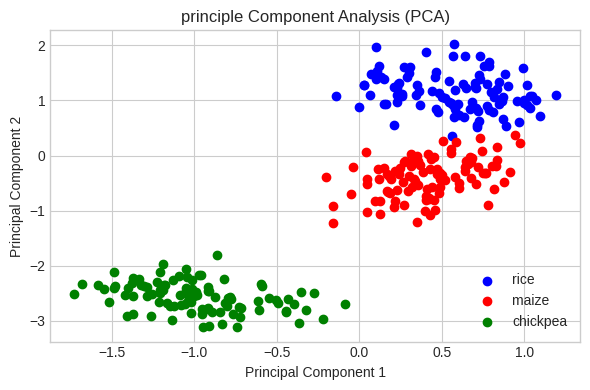

In [ ]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))
    for crop, col in zip(('rice', 'maize', 'chickpea'), ('blue', 'red', 'green')):
        indices = df.loc[df['Crop_Type'] == crop].index
        plt.scatter(Y[indices, 0], Y[indices, 1], label=crop, c=col)
    plt.title('principle Component Analysis (PCA)')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(loc='lower right')
    plt.tight_layout()
    plt.show()

### LDA



In [ ]:
# Identifying Features and Target
X = df.drop('Crop_Type', axis=1)
y = df['Crop_Type']

In [ ]:
lda = LinearDiscriminantAnalysis(n_components=2)

In [ ]:
#fitting the LDA model on the data
X_lda = lda.fit_transform(X, y)

In [ ]:
print("Explained Variance Ratio:", lda.explained_variance_ratio_)

Explained Variance Ratio: [0.84274159 0.09394853]


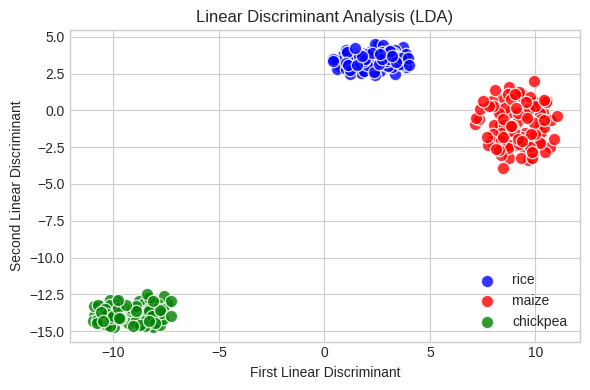

In [ ]:
import matplotlib.pyplot as plt

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))
    for crop, col in zip(('rice', 'maize', 'chickpea'), ('blue', 'red', 'green')):
        indices = df.loc[df['Crop_Type'] == crop].index
        plt.scatter(X_lda[indices, 0], X_lda[indices, 1], label=crop, c=col, s=80, edgecolors='w', alpha=0.8)

    plt.title('Linear Discriminant Analysis (LDA)')
    plt.xlabel('First Linear Discriminant')
    plt.ylabel('Second Linear Discriminant')
    plt.legend(loc='lower right')
    plt.tight_layout()
    plt.show()


### Singular Value Decomposition (SVD)

In [ ]:
from numpy import array
from sklearn.decomposition import TruncatedSVD

# svd
svd = TruncatedSVD(n_components=2)
svd.fit(X)
result = svd.transform(X)
print(result)

[[234.49126702 -63.86928105]
 [253.3340408  -68.98858887]
 [272.19898091 -81.41298278]
 ...
 [209.70734029 -68.43830054]
 [172.46722662 -43.6629466 ]
 [175.05920791 -56.78122501]]


In [ ]:
print("Explained Variance Ratio:", svd.explained_variance_ratio_)

Explained Variance Ratio: [0.26583828 0.40117093]


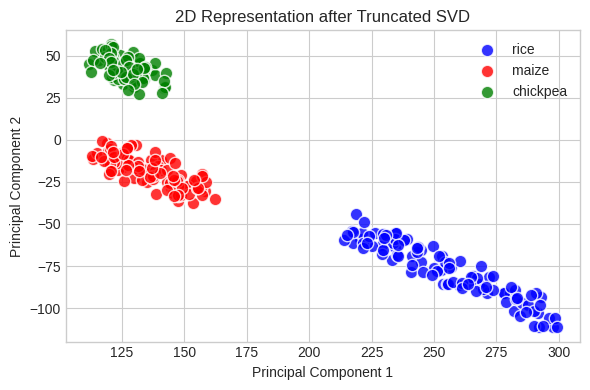

In [ ]:
import matplotlib.pyplot as plt

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))
    for crop, col in zip(('rice', 'maize', 'chickpea'), ('blue', 'red', 'green')):
        indices = df.loc[df['Crop_Type'] == crop].index
        plt.scatter(result[indices, 0], result[indices, 1], label=crop, c=col, s=80, edgecolors='w', alpha=0.8)

    plt.title('2D Representation after Truncated SVD')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(loc='upper right')
    plt.tight_layout()
    plt.show()



# 2.Model Implementations

In [ ]:
#importing important libraries
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split, cross_val_predict, StratifiedKFold
from sklearn.metrics import roc_curve, auc


In [ ]:
# Splitting into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,shuffle = True, random_state = 42,stratify=y)

### 2.1Guassian Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

acc=[]
model = []

In [ ]:
# Model implementation
gnb = GaussianNB()

gnb.fit(X_train,y_train)

predicted_values_gnb = gnb.predict(X_test)
x = metrics.accuracy_score(y_test, predicted_values_gnb)
acc.append(X)
model.append('Naive Bayes')
print("Naive Bayes's Accuracy is: ", x)


Naive Bayes's Accuracy is:  0.9954545454545455


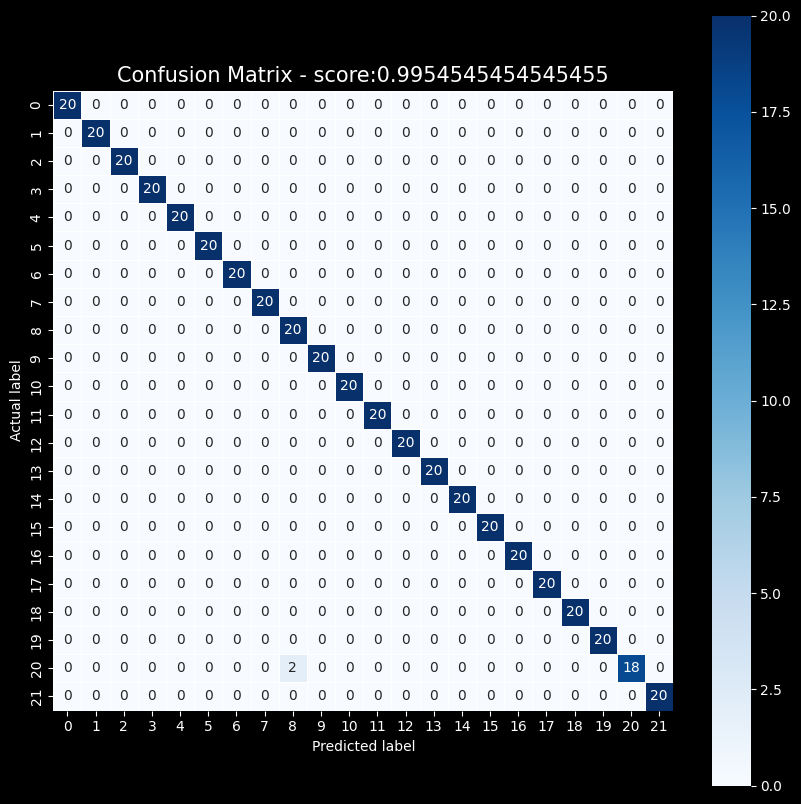

In [ ]:
# Confusion Matrix
cm_gnb = confusion_matrix(y_test, predicted_values_gnb)
plt.figure(figsize=(10, 10))
sns.heatmap(cm_gnb, annot=True, fmt=".0f", linewidths=.5, square=True, cmap='Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Confusion Matrix - score:' + str(accuracy_score(y_test, predicted_values_gnb))
plt.title(all_sample_title, size=15)
plt.show()

In [ ]:
# Model evaluation
print(classification_report(y_test,predicted_values_gnb))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        20
      banana       1.00      1.00      1.00        20
   blackgram       1.00      1.00      1.00        20
    chickpea       1.00      1.00      1.00        20
     coconut       1.00      1.00      1.00        20
      coffee       1.00      1.00      1.00        20
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        20
        jute       0.91      1.00      0.95        20
 kidneybeans       1.00      1.00      1.00        20
      lentil       1.00      1.00      1.00        20
       maize       1.00      1.00      1.00        20
       mango       1.00      1.00      1.00        20
   mothbeans       1.00      1.00      1.00        20
    mungbean       1.00      1.00      1.00        20
   muskmelon       1.00      1.00      1.00        20
      orange       1.00      1.00      1.00        20
      papaya       1.00    

In [ ]:
# ROC Curve (One-vs-All strategy) for Decision Tree
fpr_dt = dict()
tpr_dt = dict()
roc_auc_dt = dict()

# Assuming num_classes is the number of classes in your dataset
num_classes_dt = len(np.unique(y_test))

for i in range(num_classes_dt):
    # Create a binary classification problem for each class
    y_true_binary_dt = (y_test == i).astype(int)
    y_pred_prob_dt = dt_classifier.predict_proba(X_test)[:, i]

    # Compute ROC curve and ROC area
    fpr_dt[i], tpr_dt[i], _ = roc_curve(y_true_binary_dt, y_pred_prob_dt)
    roc_auc_dt[i] = auc(fpr_dt[i], tpr_dt[i])

# Plot ROC curves for Decision Tree
plt.figure(figsize=(8, 6))

for i in range(num_classes_dt):
    plt.plot(fpr_dt[i], tpr_dt[i], label=f'Class {i} (AUC = {roc_auc_dt[i]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Decision Tree')
plt.legend(loc='lower right')
plt.show()

NameError: name 'np' is not defined

### 2.2 Bayesian Belief Network

In [ ]:
pip install pgmpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 10.7 MB/s eta 0:00:00


In [ ]:
from pgmpy.models import BayesianModel
from pgmpy.estimators import ParameterEstimator, MaximumLikelihoodEstimator

X_test = df[['Nitrogen', 'Phosphorus', 'Potassium']]

# Identifying model training data
data_train = df.copy()

# Create a Bayesian Network
model = BayesianModel([
    ('Nitrogen', 'Crop_Type'),('Phosphorus', 'Crop_Type'),('Potassium', 'Crop_Type')
])

# Estimate the parameters using Maximum Likelihood Estimation
model.fit(data_train, estimator=MaximumLikelihoodEstimator)

# Predictions on the test set
predicted_values_bbn = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, predicted_values_bbn['Crop_Type'])
print("Bayesian Belief Network's Accuracy is:", accuracy)


KeyboardInterrupt: 

In [ ]:
# Plotting the confusion matrix

cm_bbn = confusion_matrix(y_test, predicted_values_bnn)
plt.figure(figsize=(10, 10))
sns.heatmap(cm_bbn, annot=True, fmt=".0f", linewidths=.5, square=True, cmap='Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Confusion Matrix - score:' + str(accuracy_score(y_test, predicted_values_bnn))
plt.title(all_sample_title, size=15)
plt.show()

In [ ]:
# Display classification report
print(classification_report(y_test, predicted_values_bnn['Crop_Type']))


### 2.3 Decision Tree (Entropy, and error estimation)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Model implementation
DT= DecisionTreeClassifier(criterion='entropy', random_state=0)
DT.fit(X_train, y_train)

predicted_values_dt=DT.predict(X_test)

accuracy=accuracy_score(predicted_values_dt, y_test)

print('Decision Tree Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, predicted_values_dt)))

Decision Tree Model accuracy score: 0.9841


In [ ]:
# Error estimation
score = cross_val_score(DT, X, y,cv=5)
score

array([0.98863636, 0.96818182, 0.99318182, 0.98636364, 0.97727273])

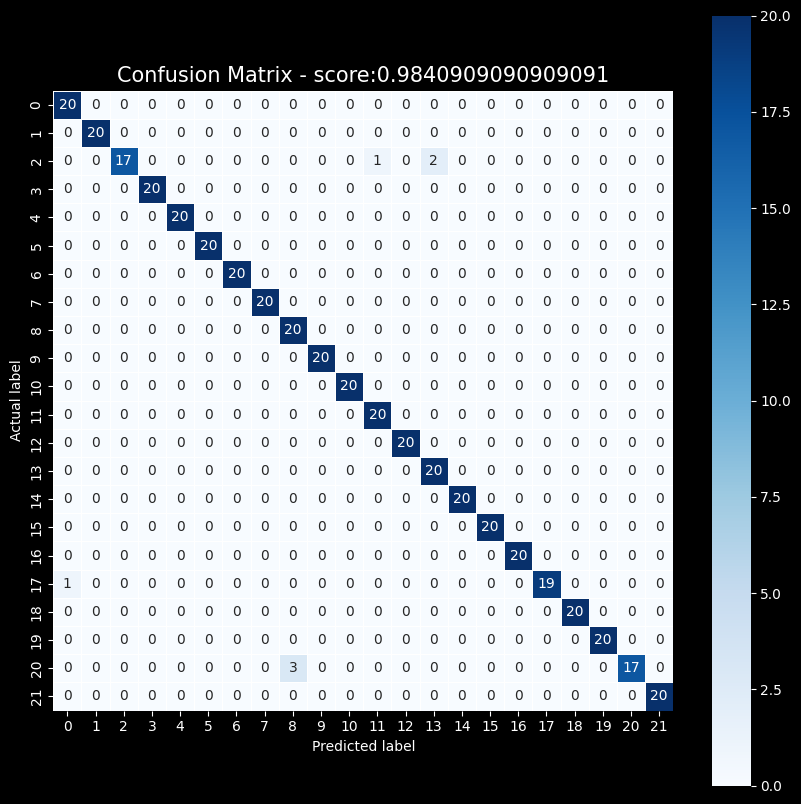

In [ ]:
# Confusion Matrix
cm_dt = confusion_matrix(y_test, predicted_values_dt)
plt.figure(figsize=(10,10))
sns.heatmap(cm_dt, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix - score:'+str(accuracy_score(y_test,predicted_values_dt))
plt.title(all_sample_title, size = 15);
plt.show()


In [ ]:
# Model evaluation
print(classification_report(y_test,predicted_values_dt))

              precision    recall  f1-score   support

       apple       0.95      1.00      0.98        20
      banana       1.00      1.00      1.00        20
   blackgram       1.00      0.85      0.92        20
    chickpea       1.00      1.00      1.00        20
     coconut       1.00      1.00      1.00        20
      coffee       1.00      1.00      1.00        20
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        20
        jute       0.87      1.00      0.93        20
 kidneybeans       1.00      1.00      1.00        20
      lentil       1.00      1.00      1.00        20
       maize       0.95      1.00      0.98        20
       mango       1.00      1.00      1.00        20
   mothbeans       0.91      1.00      0.95        20
    mungbean       1.00      1.00      1.00        20
   muskmelon       1.00      1.00      1.00        20
      orange       1.00      1.00      1.00        20
      papaya       1.00    

In [ ]:
# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_train)

# Calculate the Area Under the Curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Decision Tree Model')
plt.legend(loc='lower right')
plt.show()

ValueError: multiclass format is not supported

### 2.4 K-NN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# Model Implementation
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train,y_train)

predicted_values_knn = knn.predict(X_test)

accuracy = accuracy_score(y_test, predicted_values_knn)
print('Accuracy score: ', accuracy )

Accuracy score:  0.9818181818181818


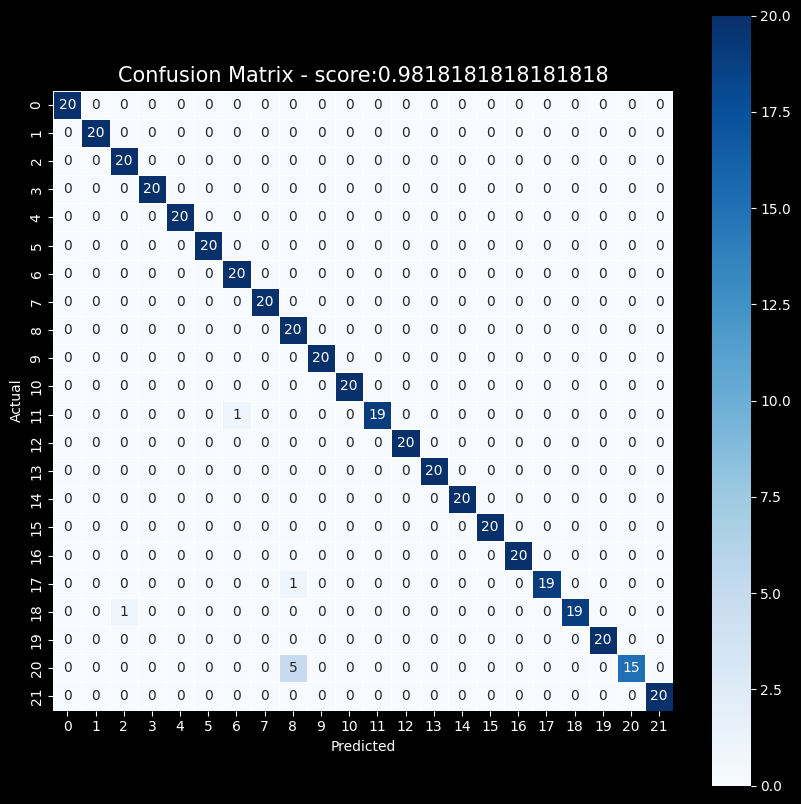

In [ ]:
# Confusion Matrix
cm_knn=confusion_matrix(y_test,predicted_values_knn)
plt.figure(figsize=(10,10))
sns.heatmap(cm_knn,annot=True,fmt=".0f", linewidths=.5, square = True, cmap = 'Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
all_sample_title = 'Confusion Matrix - score:'+str(accuracy_score(y_test,predicted_values_knn))
plt.title(all_sample_title, size = 15);
plt.show()


In [ ]:
# Model Evaluation
print(classification_report(y_test,predicted_values_knn))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        20
      banana       1.00      1.00      1.00        20
   blackgram       0.95      1.00      0.98        20
    chickpea       1.00      1.00      1.00        20
     coconut       1.00      1.00      1.00        20
      coffee       1.00      1.00      1.00        20
      cotton       0.95      1.00      0.98        20
      grapes       1.00      1.00      1.00        20
        jute       0.77      1.00      0.87        20
 kidneybeans       1.00      1.00      1.00        20
      lentil       1.00      1.00      1.00        20
       maize       1.00      0.95      0.97        20
       mango       1.00      1.00      1.00        20
   mothbeans       1.00      1.00      1.00        20
    mungbean       1.00      1.00      1.00        20
   muskmelon       1.00      1.00      1.00        20
      orange       1.00      1.00      1.00        20
      papaya       1.00    

### 2.5 PCA

In [ ]:
# Function for training and evaluating a classifier
def train_and_evaluate(classifier, X_train, X_test, y_train, y_test):

    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

In [ ]:
# Standardize the features (important for PCA and LDA)
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [ ]:
# Principal Component Analysis (PCA)
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

In [ ]:
# Classification using k-Nearest Neighbors (k-NN) with PCA features
knn_pca = KNeighborsClassifier(n_neighbors=5)

In [ ]:
# K-fold cross-validation for PCA
cv_pca = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
y_pred_pca = cross_val_predict(knn_pca, X_train_pca, y_train, cv=cv_pca)

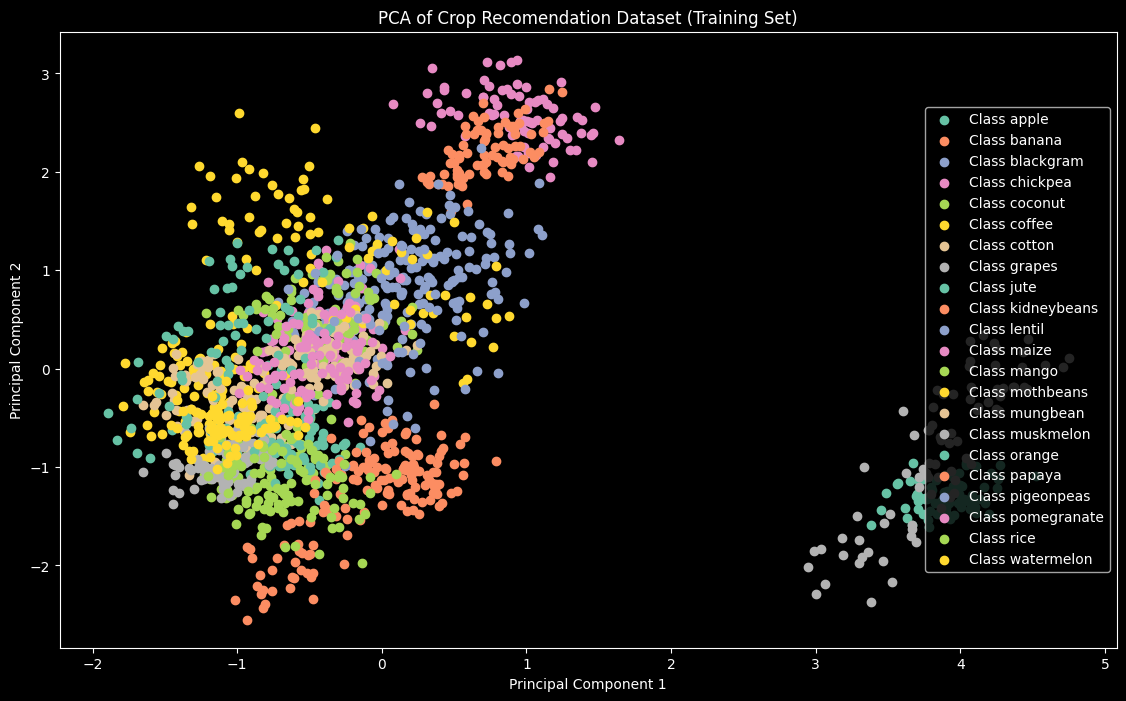

In [ ]:
# Visualize the data after PCA
plt.figure(figsize=(30, 8))
plt.subplot(1, 2, 1)
for label in np.unique(y_train):
    plt.scatter(X_train_pca[y_train == label, 0], X_train_pca[y_train == label, 1], label=f'Class {label}')
plt.title('PCA of Crop Recomendation Dataset (Training Set)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(loc='center right')
plt.show()

In [ ]:
# Evaluate using PCA features
accuracy_pca = train_and_evaluate(knn_pca, X_train_pca, X_test_pca, y_train, y_test)
print(f'Accuracy using k-NN with PCA: {accuracy_pca:.2%}')


Accuracy using k-NN with PCA: 50.68%


### 2.6 LDA

In [ ]:
# Linear Discriminant Analysis (LDA)
lda = LinearDiscriminantAnalysis(n_components=2)
X_train_lda = lda.fit_transform(X_train_std, y_train)
X_test_lda = lda.transform(X_test_std)

In [ ]:
# Classification using k-Nearest Neighbors (k-NN) with LDA features
knn_lda = KNeighborsClassifier(n_neighbors=3)

In [ ]:
# K-fold cross-validation for LDA
cv_lda = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
y_pred_lda = cross_val_predict(knn_lda, X_train_lda, y_train, cv=cv_lda)

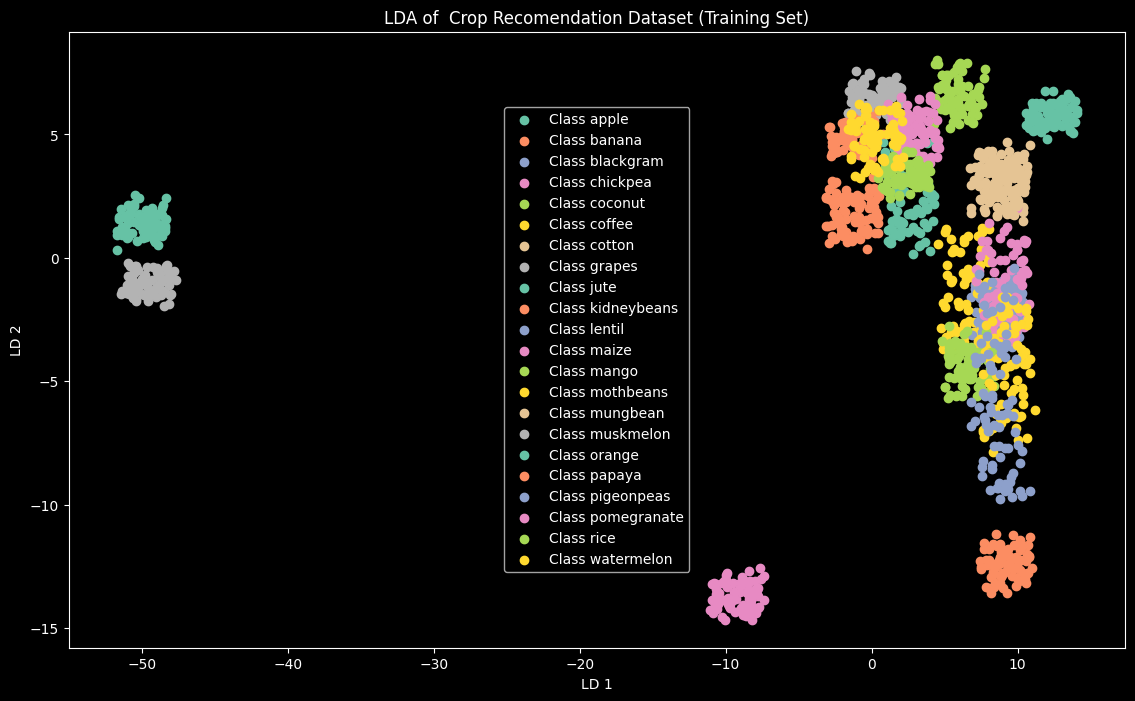

In [ ]:
# Visualize the data after LDA
plt.figure(figsize=(30, 8))
plt.subplot(1, 2, 2)
for label in np.unique(y_train):
    plt.scatter(X_train_lda[y_train == label, 0], X_train_lda[y_train == label, 1], label=f'Class {label}')
plt.title('LDA of  Crop Recomendation Dataset (Training Set)')
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='center')
plt.show()

In [ ]:
# Evaluate using LDA features
accuracy_lda = train_and_evaluate(knn_lda, X_train_lda, X_test_lda, y_train, y_test)
print(f'Accuracy using k-NN with LDA: {accuracy_lda:.2%}')

Accuracy using k-NN with LDA: 71.14%


### 2.7 Neural Network

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import BatchNormalization

# Encode the target variable
encoder = LabelEncoder()
y_train_encoded = encoder.fit_transform(y_train)
y_test_encoded = encoder.transform(y_test)

# Build the neural network model
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(32, activation='relu'))
model.add(Dense(len(encoder.classes_), activation='softmax'))


# Compile the model
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=Adam(lr=0.001),
              metrics=['accuracy'])


# Train the model
model.fit(X_train, y_train_encoded, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
accuracy = model.evaluate(X_test, y_test_encoded)[1]
print(f"Accuracy on the test set: {accuracy * 100:.2f}%")


Epoch 1/50
44/44 [==============================] - 2s 10ms/step - loss: 2.7212 - accuracy: 0.2159 - val_loss: 2.3691 - val_accuracy: 0.2727
Epoch 2/50
44/44 [==============================] - 0s 4ms/step - loss: 1.8766 - accuracy: 0.5057 - val_loss: 1.6722 - val_accuracy: 0.4943
Epoch 3/50
44/44 [==============================] - 0s 4ms/step - loss: 1.2424 - accuracy: 0.6811 - val_loss: 1.0291 - val_accuracy: 0.6335
Epoch 4/50
44/44 [==============================] - 0s 4ms/step - loss: 0.9329 - accuracy: 0.7464 - val_loss: 0.5176 - val_accuracy: 0.9062
Epoch 5/50
44/44 [==============================] - 0s 4ms/step - loss: 0.6697 - accuracy: 0.8253 - val_loss: 0.3223 - val_accuracy: 0.9460
Epoch 6/50
44/44 [==============================] - 0s 4ms/step - loss: 0.5419 - accuracy: 0.8331 - val_loss: 0.2478 - val_accuracy: 0.9688
Epoch 7/50
44/44 [==============================] - 0s 6ms/step - loss: 0.4505 - accuracy: 0.8608 - val_loss: 0.1907 - val_accuracy: 0.9602
Epoch 8/50
44/44 [=

In [ ]:
# Predictions
y_pred_probabilities = model.predict(X_test_std)
y_pred = np.argmax(y_pred_probabilities, axis=1)


14/14 [==============================] - 0s 2ms/step


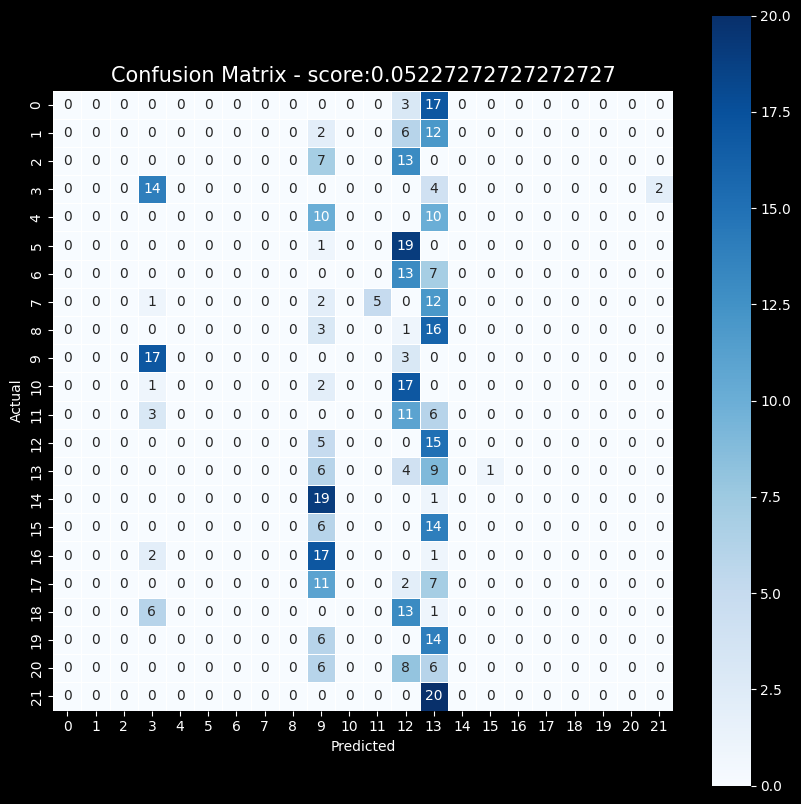

In [ ]:
# Confusion Matrix
conf_mat = confusion_matrix(y_test_encoded, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(conf_mat, annot=True, fmt=".0f", linewidths=.5, square=True, cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
all_sample_title = 'Confusion Matrix - score:' + str(accuracy_score(y_test_encoded, y_pred))
plt.title(all_sample_title, size=15)
plt.show()

In [ ]:
# Classification Report
class_report = classification_report(y_test_encoded, y_pred)
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        20
           1       0.00      0.00      0.00        20
           2       0.00      0.00      0.00        20
           3       0.32      0.70      0.44        20
           4       0.00      0.00      0.00        20
           5       0.00      0.00      0.00        20
           6       0.00      0.00      0.00        20
           7       0.00      0.00      0.00        20
           8       0.00      0.00      0.00        20
           9       0.00      0.00      0.00        20
          10       0.00      0.00      0.00        20
          11       0.00      0.00      0.00        20
          12       0.00      0.00      0.00        20
          13       0.05      0.45      0.09        20
          14       0.00      0.00      0.00        20
          15       0.00      0.00      0.00        20
          16       0.00      0.00      0.00        20
   

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


14/14 [==============================] - 0s 2ms/step


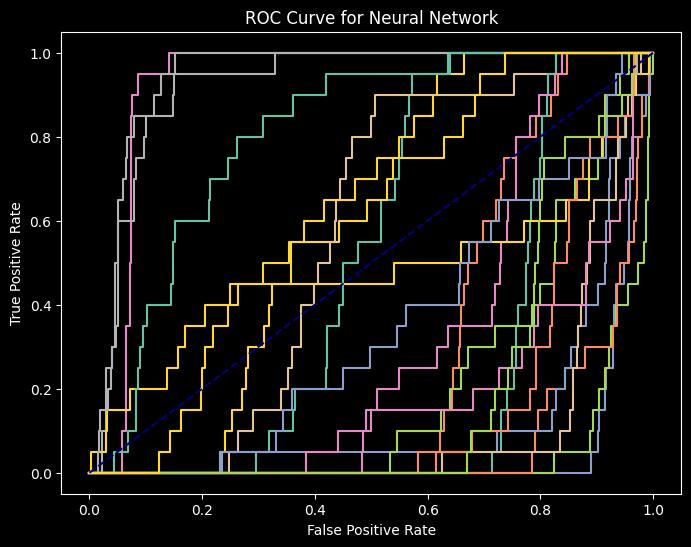

In [ ]:
# ROC Curve (One-vs-All strategy)
fpr = dict()
tpr = dict()
roc_auc = dict()

# Assuming num_classes is the number of classes in your dataset
num_classes = len(np.unique(y_test_encoded))

for i in range(num_classes):
    # Create a binary classification problem for each class
    y_true_binary = (y_test_encoded == i).astype(int)
    y_pred_prob = model.predict(X_test_std)[:, i]

    # Compute ROC curve and ROC area
    fpr[i], tpr[i], _ = roc_curve(y_true_binary, y_pred_prob)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure(figsize=(8, 6))

for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Neural Network')
plt.show()

### evaluation for all models

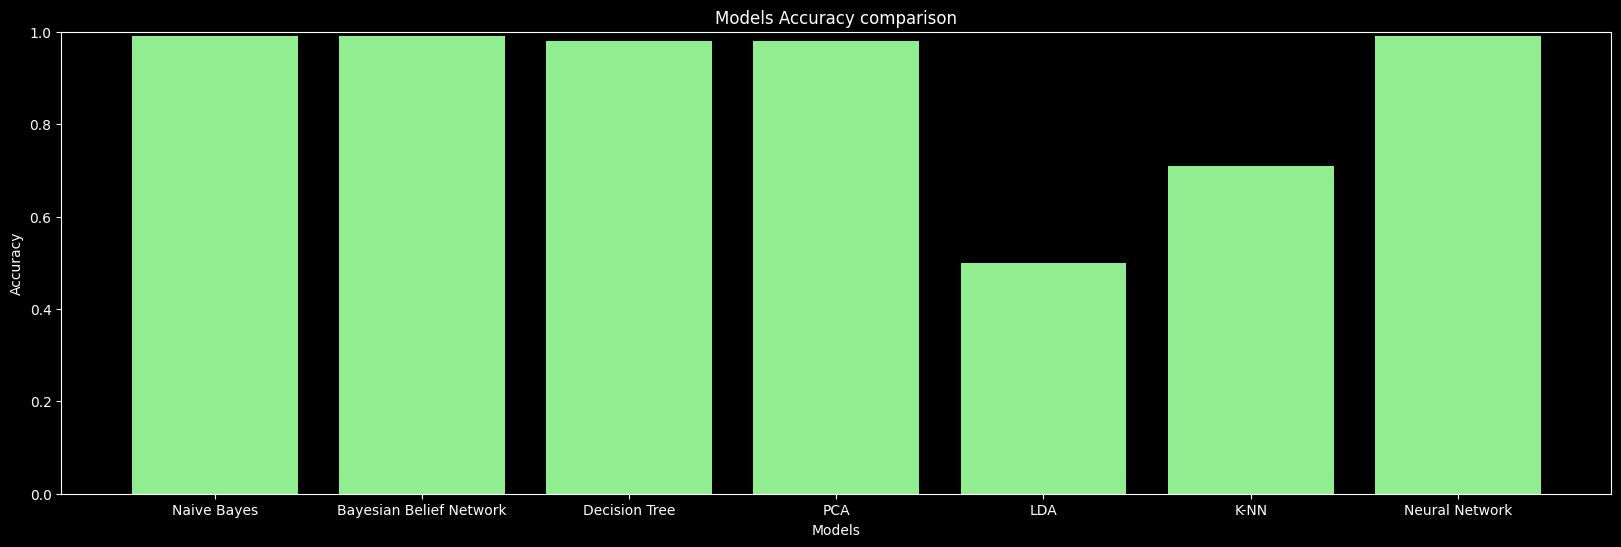

In [ ]:
import matplotlib.pyplot as plt

# Model names and corresponding accuracies (you can replace these with your actual values)
models = ['Naive Bayes', 'Bayesian Belief Network', 'Decision Tree', 'PCA', 'LDA', 'K-NN', 'Neural Network']
accuracies = [0.99, 0.99, 0.98, 0.98, 0.5, 0.71, 0.99]


# Plotting the histogram
plt.figure(figsize=(20, 6))
plt.bar(models, accuracies, color='lightgreen')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Models Accuracy comparison')
plt.ylim(0, 1)  # Set the y-axis limit based on your accuracy scale (0-100)
plt.show()
